# Tentativa com o dataset dividido pelo professor:

In [1]:
# Configura o backend do MatPlotLib para rodar no notebook:
%matplotlib inline

# Algoritmo de Machine Learning:
from sklearn import svm

# Outras Bibliotecas para Análise:
import pandas as pd
import numpy as np

# Bibliotecas para Visualização:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.0)



In [2]:
#Importando dados de Treino:
df = pd.read_csv('./winedata/wineQuality_train.data')
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.33,0.30,3.3,0.034,30.0,102.0,0.9912,3.08,0.31,12.3,1
1,6.0,0.39,0.17,12.0,0.046,65.0,246.0,0.9976,3.15,0.38,9.0,0
2,7.9,0.18,0.49,5.2,0.051,36.0,157.0,0.9953,3.18,0.48,10.6,0
3,6.2,0.28,0.51,7.9,0.056,49.0,206.0,0.9956,3.18,0.52,9.4,0
4,7.0,0.50,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,0


In [3]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.00000,3898.000000
mean,7.194856,0.338612,0.316937,5.417560,0.055838,30.636480,115.326193,0.994693,3.219990,0.531716,10.47086,0.197794
std,1.288114,0.165625,0.145681,4.749572,0.035015,17.703713,56.485832,0.003000,0.160671,0.151695,1.18481,0.398387
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.740000,0.230000,8.00000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,76.250000,0.992380,3.110000,0.430000,9.50000,0.000000
50%,6.900000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994860,3.210000,0.510000,10.30000,0.000000
75%,7.600000,0.400000,0.390000,8.000000,0.064000,41.000000,155.000000,0.996958,3.320000,0.600000,11.30000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,146.500000,366.500000,1.038980,4.010000,2.000000,14.90000,1.000000


In [4]:
# Normalizações prévias (acabei decidindo fazer feature scaling mais lá pra baixo):

# min-max
#df_norm = (df - df.mean()) / (df.max() - df.min())

# valor-z
# df_norm = (df - df.mean())/df.std()

# todas as colunas na mesma escala:
#df_norm = df - df.min()
#df_norm = df_norm / df.max()

#df_norm.describe()

In [5]:
# Verificação de range para valor-z e min-max:
#df_norm.max() - df_norm.min()

In [6]:
# Para trabalhar em cima do valor normalizado:
#df = df_norm

In [7]:
# ------ Segue uma série de testes para entender os dados: -----

df[df.quality==0].count()

fixed.acidity           3127
volatile.acidity        3127
citric.acid             3127
residual.sugar          3127
chlorides               3127
free.sulfur.dioxide     3127
total.sulfur.dioxide    3127
density                 3127
pH                      3127
sulphates               3127
alcohol                 3127
quality                 3127
dtype: int64

In [8]:
df[df.quality==1].count()

fixed.acidity           771
volatile.acidity        771
citric.acid             771
residual.sugar          771
chlorides               771
free.sulfur.dioxide     771
total.sulfur.dioxide    771
density                 771
pH                      771
sulphates               771
alcohol                 771
quality                 771
dtype: int64

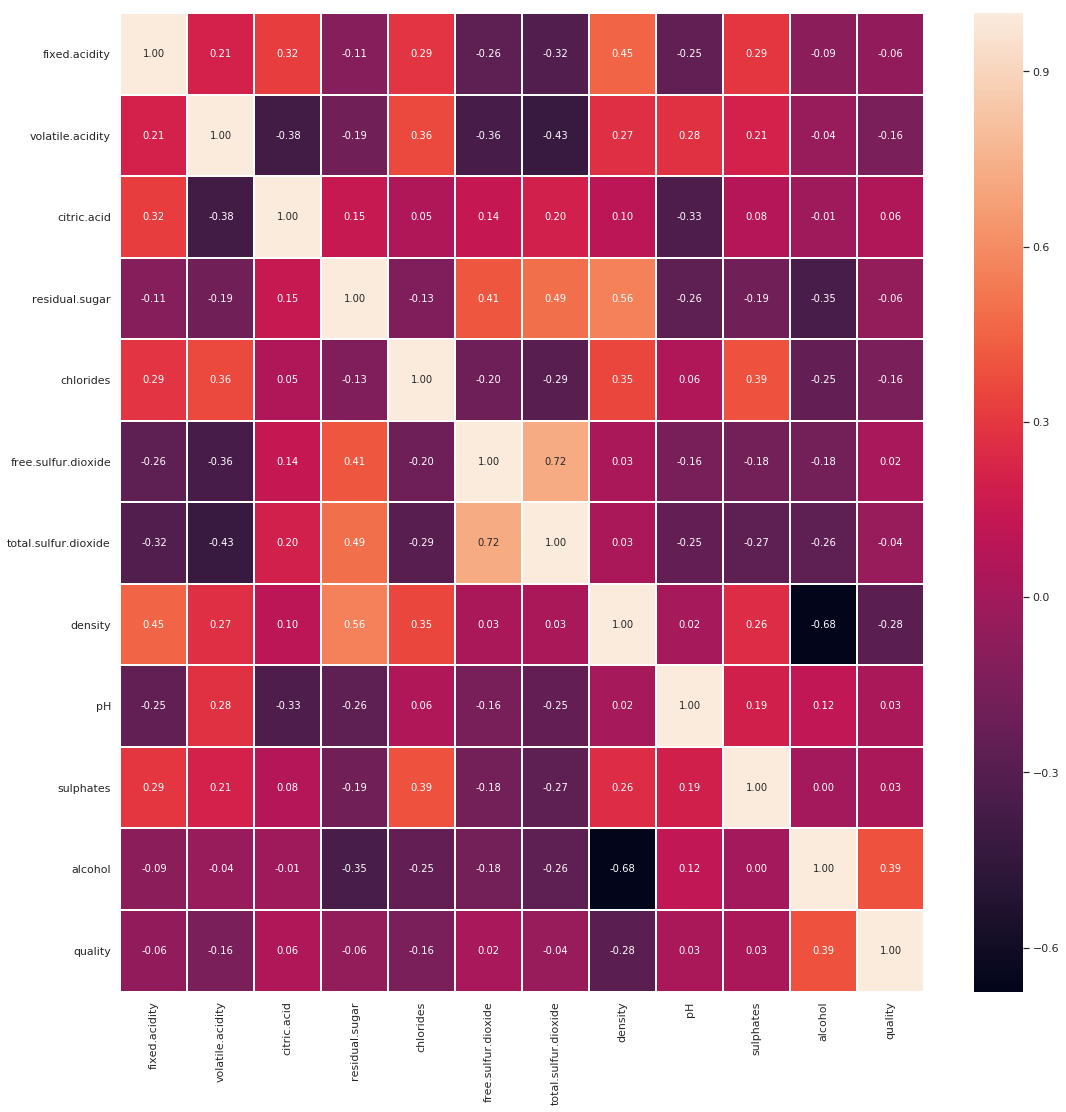

In [9]:
# Verificando a Correlação entre Variáveis e Target:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt= '.2f',ax=ax)

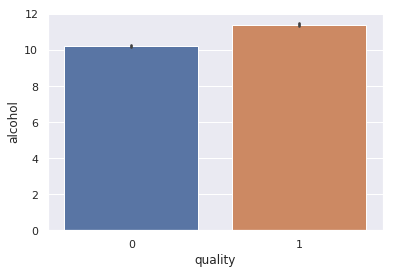

In [10]:
sns.barplot(x='quality', y='alcohol',data=df)

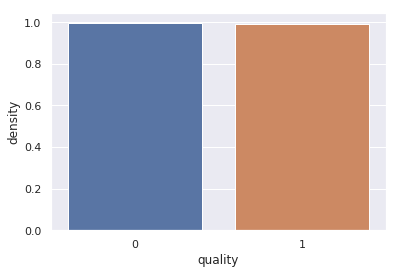

In [11]:
sns.barplot(x='quality', y='density',data=df)

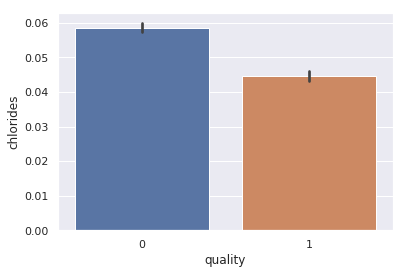

In [12]:
sns.barplot(x='quality', y='chlorides',data=df)

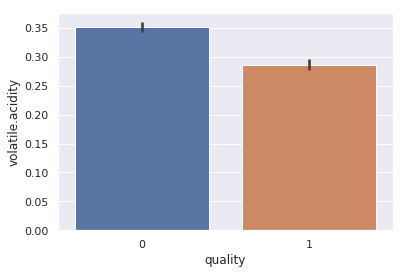

In [13]:
sns.barplot(x='quality', y='volatile.acidity',data=df)

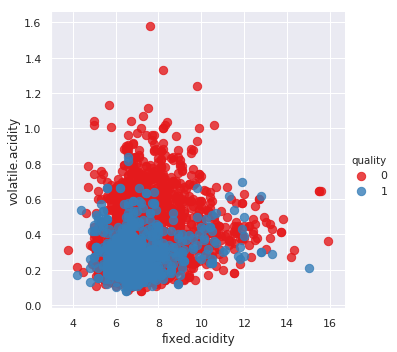

In [14]:
sns.lmplot('fixed.acidity', 'volatile.acidity', data=df, hue='quality', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})

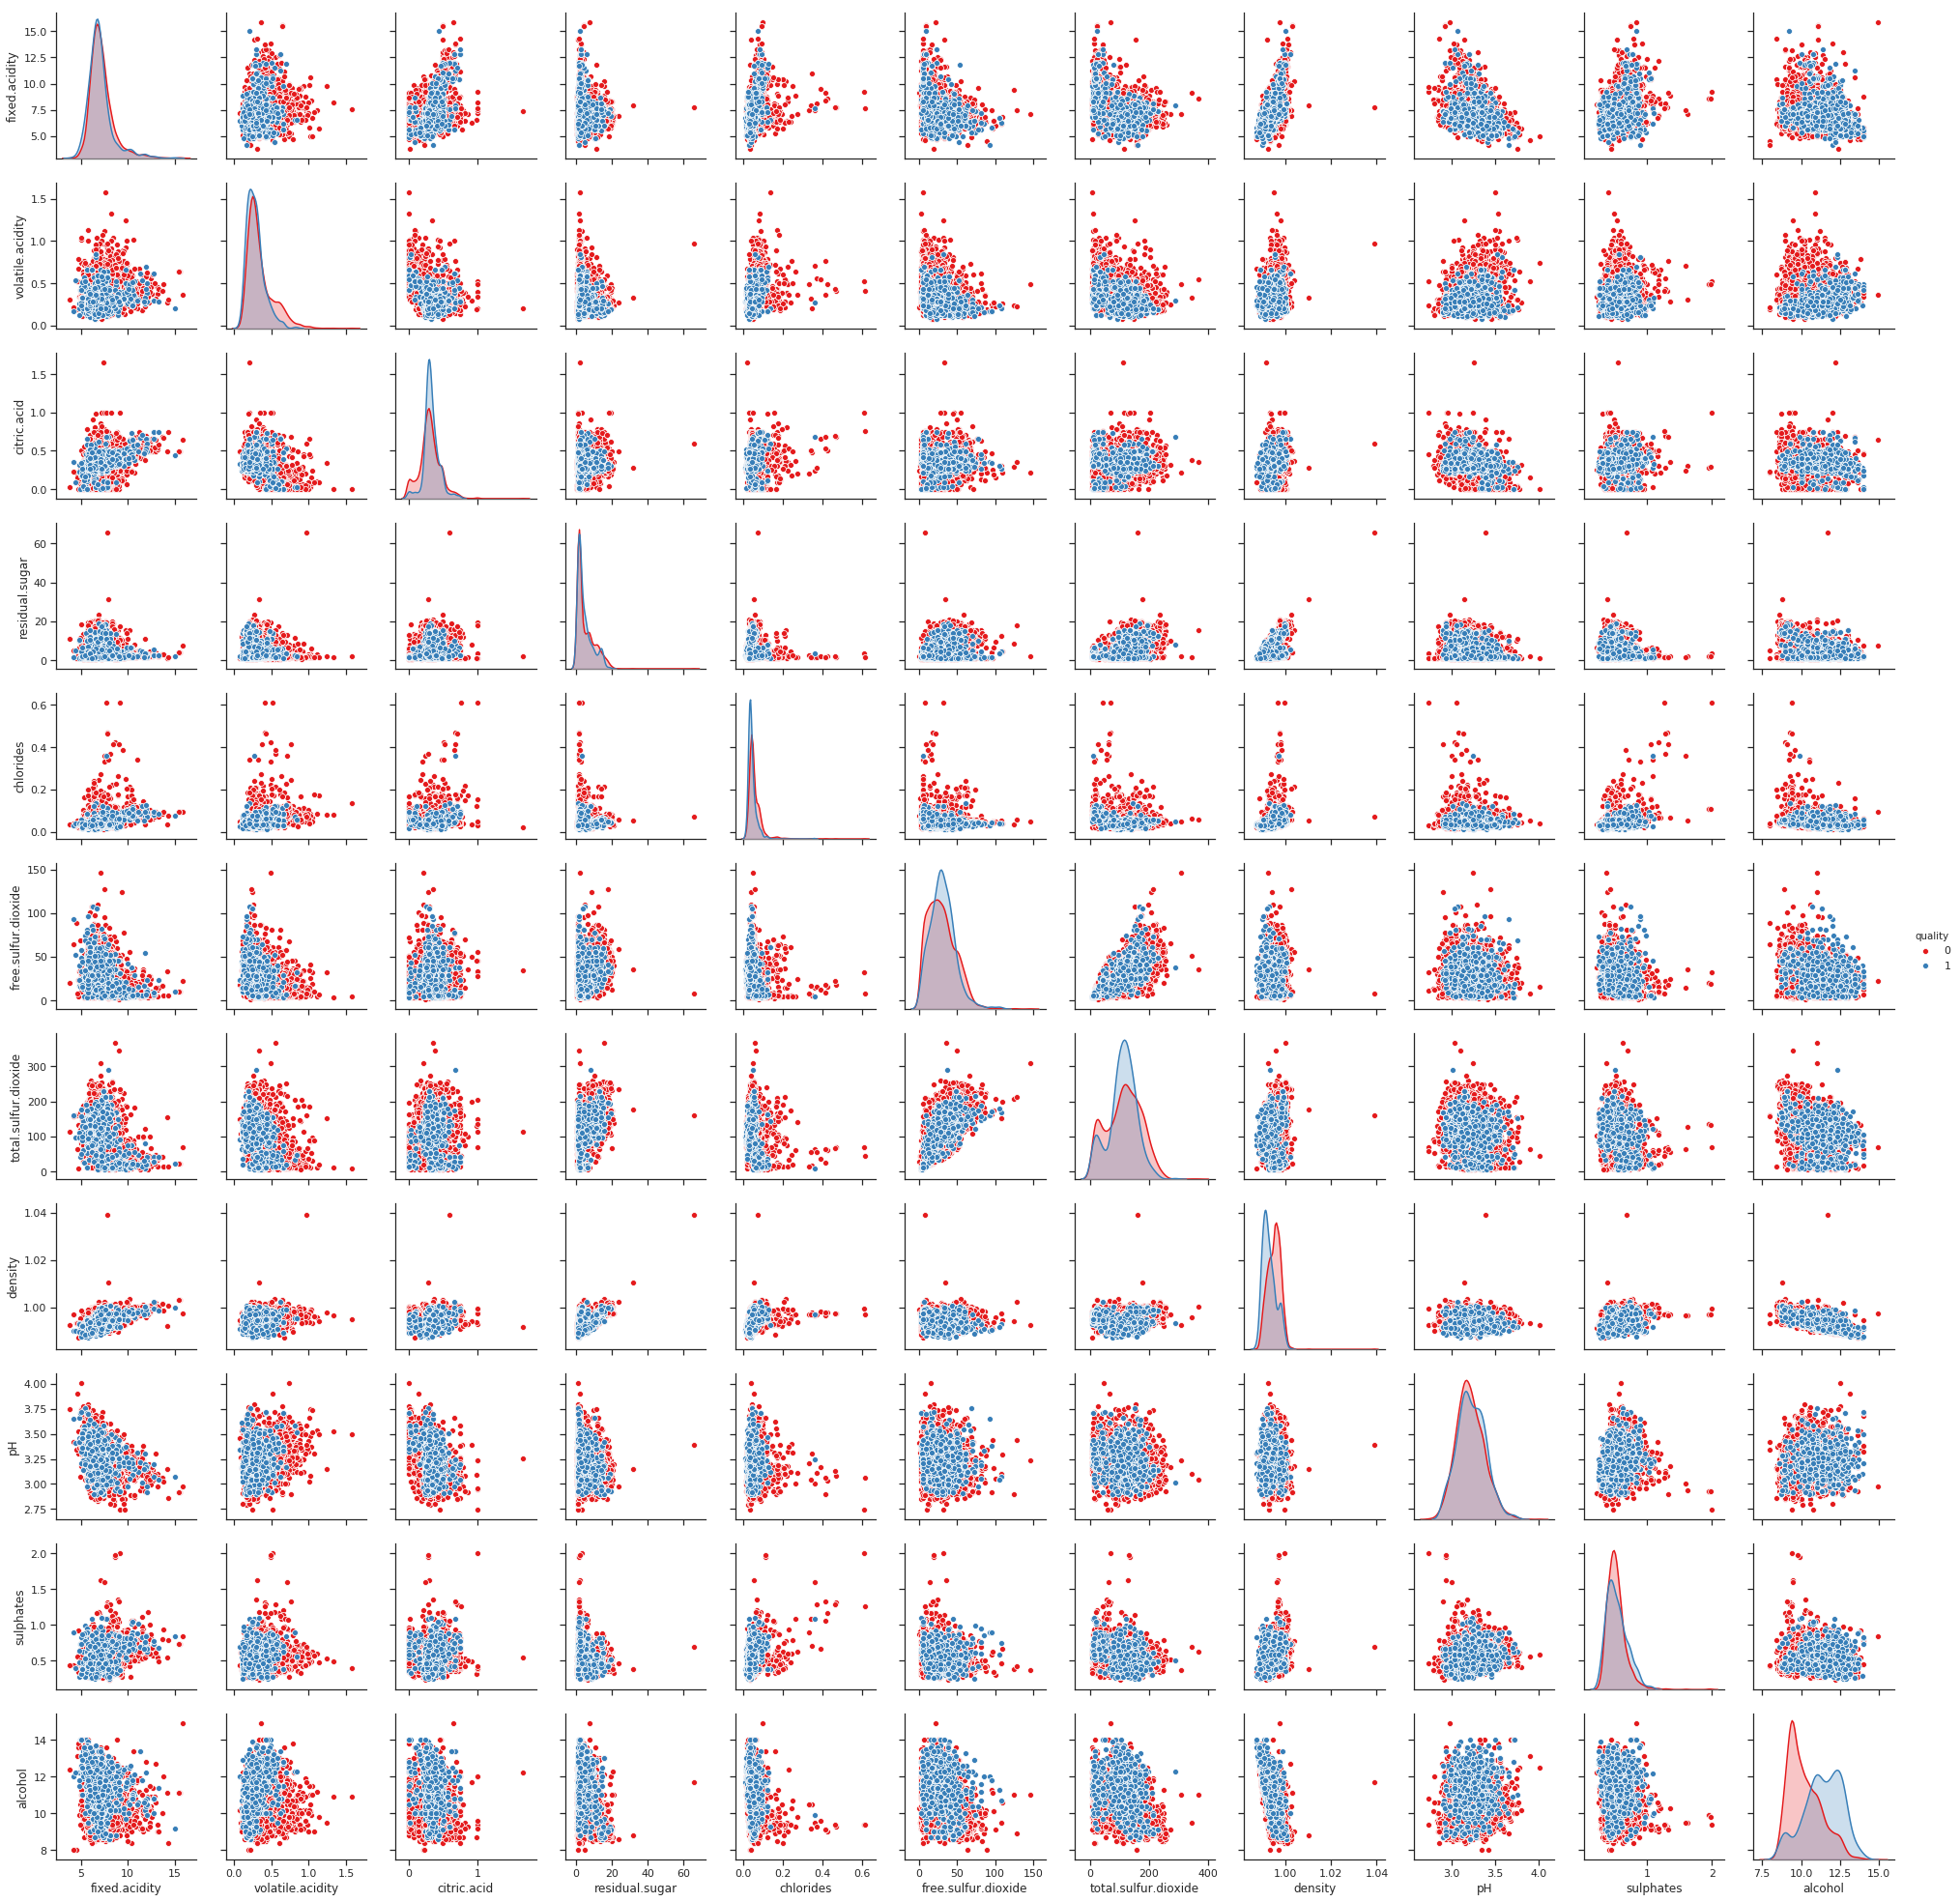

In [15]:
sns.set(style="ticks", color_codes=True) 

sns.pairplot(df, vars=df.columns[:-1], hue='quality', palette='Set1')

# ------ Fim dos testes para entender os dados: -----

In [16]:
# Dividindo o dataset em features e target:
X = df.drop(['quality'], axis='columns')
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.1,0.33,0.30,3.3,0.034,30.0,102.0,0.9912,3.08,0.31,12.3
1,6.0,0.39,0.17,12.0,0.046,65.0,246.0,0.9976,3.15,0.38,9.0
2,7.9,0.18,0.49,5.2,0.051,36.0,157.0,0.9953,3.18,0.48,10.6
3,6.2,0.28,0.51,7.9,0.056,49.0,206.0,0.9956,3.18,0.52,9.4
4,7.0,0.50,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2


In [17]:
# Dividindo o dataset em features e target:
y = df.drop(df.iloc[:, 0:-1], axis='columns')

In [18]:
y = y.values.ravel() # por conta de um DataConversionWarning no momento do model.fit()
print(y)

[1 0 0 ... 1 0 0]


In [19]:
# Importando dados de Validação:
df_test = pd.read_csv('./winedata/wineQuality_test.data')
X_test = df_test.drop(['quality'], axis='columns')
y_test = df_test.drop(df.iloc[:, 0:-1], axis='columns').values.ravel()

In [20]:
df_test[df_test.quality==0].count()

fixed.acidity           502
volatile.acidity        502
citric.acid             502
residual.sugar          502
chlorides               502
free.sulfur.dioxide     502
total.sulfur.dioxide    502
density                 502
pH                      502
sulphates               502
alcohol                 502
quality                 502
dtype: int64

In [21]:
df_test[df_test.quality==1].count()

fixed.acidity           798
volatile.acidity        798
citric.acid             798
residual.sugar          798
chlorides               798
free.sulfur.dioxide     798
total.sulfur.dioxide    798
density                 798
pH                      798
sulphates               798
alcohol                 798
quality                 798
dtype: int64

In [22]:
# Feature Scaling para X e X_test (usa normalização em valores-x):
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [23]:
model = svm.SVC(C=10, gamma=0.9, kernel='rbf')
model.fit(X, y)
model.score(X_test, y_test)

0.5215384615384615

In [24]:
model.score(X_test, y_test)

0.5215384615384615

In [25]:
#Dummy Classifier para efeitos de comparação de Acurácia:

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(X, y)
dummy.score(X_test, y_test) 

0.3861538461538462

In [26]:
# Jogando a previsão para uma variável:
y_pred = model.predict(X_test)

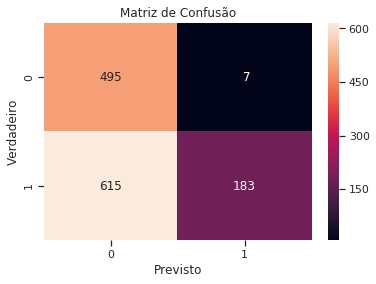

In [27]:
#Plotando a Matriz de Confusão:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')

In [28]:
# Outra maneira de visualizar a Acurácia:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5215384615384615

# Tentativa com de dados de treino reduzidos:

In [29]:
df_sorted = df.sort_values(by=['quality'])
df_sorted = df_sorted.reset_index().drop(['index'], axis='columns')
df_sorted

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.32,0.32,1.7,0.031,31.0,114.0,0.98946,3.12,0.35,12.5,0
1,6.6,0.62,0.20,8.7,0.046,81.0,224.0,0.99605,3.17,0.44,9.3,0
2,5.7,0.20,0.24,13.8,0.047,44.0,112.0,0.99837,2.97,0.66,8.8,0
3,7.8,0.44,0.28,2.7,0.100,18.0,95.0,0.99660,3.22,0.67,9.4,0
4,6.0,0.45,0.65,9.7,0.080,11.0,159.0,0.99560,3.04,0.48,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,6.7,0.18,0.31,10.6,0.035,42.0,143.0,0.99572,3.08,0.49,9.8,1
3894,6.3,0.27,0.38,0.9,0.051,7.0,140.0,0.99260,3.45,0.50,10.5,1
3895,7.2,0.23,0.39,14.2,0.058,49.0,192.0,0.99790,2.98,0.48,9.0,1
3896,8.0,0.19,0.36,1.8,0.050,16.0,84.0,0.99360,3.15,0.45,9.8,1


In [30]:
df_reduzido = df_sorted.drop(df.index[0: 2500], axis=0)
df_reduzido.count()

fixed.acidity           1398
volatile.acidity        1398
citric.acid             1398
residual.sugar          1398
chlorides               1398
free.sulfur.dioxide     1398
total.sulfur.dioxide    1398
density                 1398
pH                      1398
sulphates               1398
alcohol                 1398
quality                 1398
dtype: int64

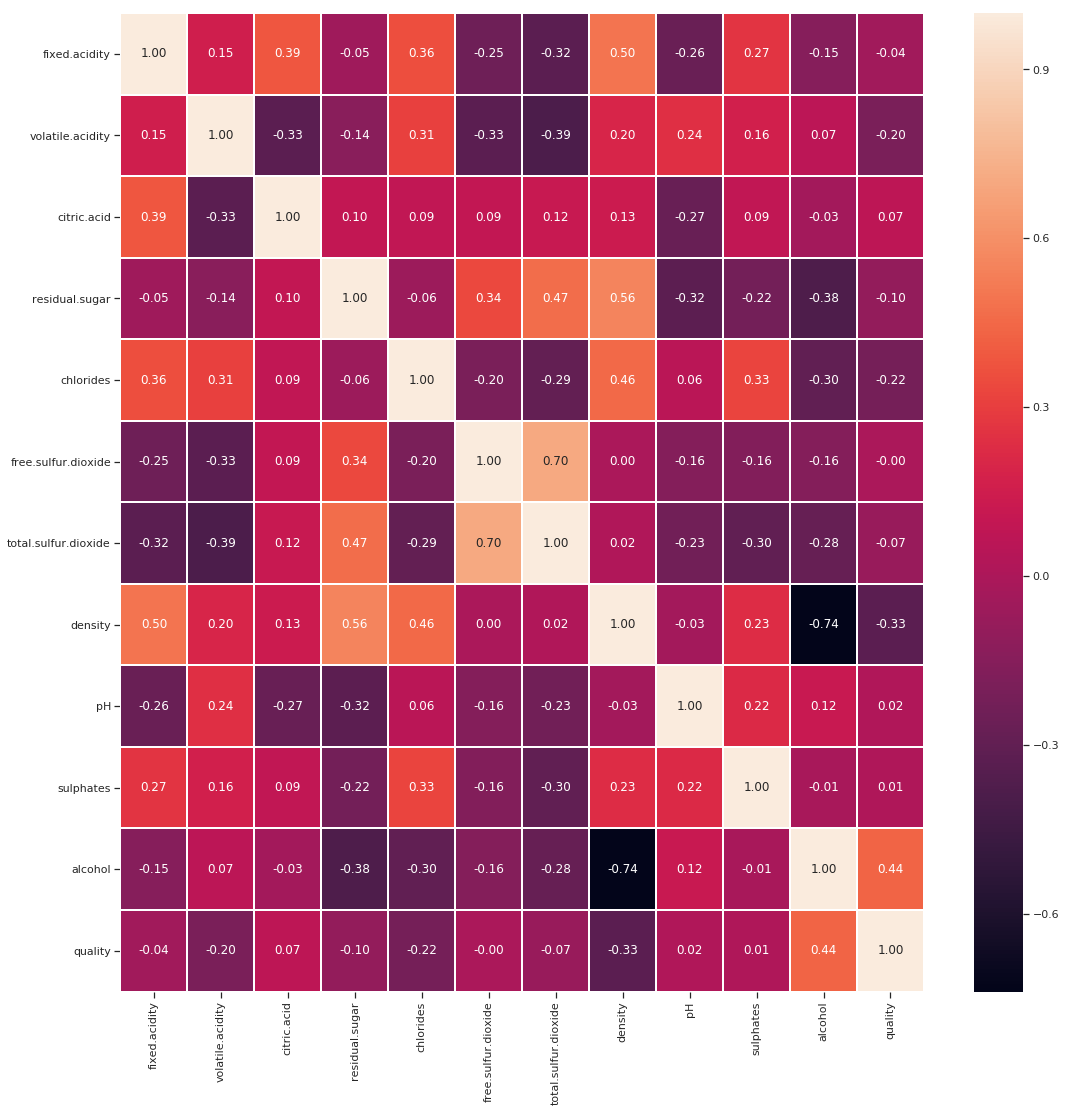

In [31]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_reduzido.corr(), annot=True, linewidths=1, fmt= '.2f',ax=ax)

In [32]:
X = df_reduzido.drop(['quality'], axis='columns')
y = df_reduzido.drop(df.iloc[:, 0:-1], axis='columns').values.ravel()
X_test = df_test.drop(['quality'], axis='columns')
y_test = df_test.drop(df.iloc[:, 0:-1], axis='columns').values.ravel()


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)


In [33]:
model = svm.SVC(C=1, gamma='auto', kernel='rbf')
model.fit(X, y)
model.score(X_test, y_test)

0.7223076923076923

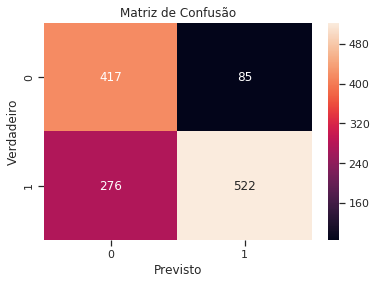

In [34]:
#Plotando a Matriz de Confusão:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')

In [35]:
#teste com Árvore de Decisão:

from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X, y)
model.score(X_test, y_test)



0.6223076923076923